# IMDb Movie Ratings and Reviews Analysis

## Overview
The IMDb Movie Ratings dataset provides a comprehensive record of films, capturing key metrics such as audience ratings, genres, production budgets, and box office performance. The dataset includes detailed information on movies released across the globe, offering insights into their critical and commercial success. With data spanning various years, this resource enables the analysis of trends in audience preferences, the impact of genres, and the factors contributing to box office performance. This analysis aims to uncover actionable insights to guide strategic decisions in the film industry.

## Data Source
The dataset contains detailed records of movies, including information such as audience ratings, genres, production budgets, release years, and box office performance. While the dataset provides comprehensive coverage of recent films, some older movies or independent productions may have incomplete financial data or limited audience reviews. Additionally, certain records might lack detailed information on cast or crew due to gaps in historical data collection.

## Business Understanding
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Objectives
- Identify High-Performing Genres
Analyze the genres of movies with the highest average ratings and box office success to determine which types of films resonate most with audiences. This will guide the studio in selecting the most profitable genres to produce.

- Evaluate Key Movie Attributes
Examine factors such as runtime, release year, and the number of votes to identify attributes correlated with higher audience ratings. These insights will help optimize the characteristics of films for better audience reception.

- Understand the Impact of Audience Engagement
Investigate the relationship between the number of votes and average ratings to assess the significance of audience engagement. This will inform strategies for marketing and audience outreach to enhance a film's visibility and success.

# Data Understanding

In [144]:
# Importing the libraries
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
sns.set(style="white", color_codes=True)
%matplotlib inline

In [145]:

zip_filename = "/content/drive/MyDrive/im.db.zip"

# Unzip the file
try:
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall("output_directory")
    print("File extracted successfully!")
except zipfile.BadZipFile:
    print("Error: The file is not a valid ZIP archive.")
except Exception as e:
    print(f"An error occurred: {e}")


File extracted successfully!


In [146]:
# List the files in the current directory
os.listdir()


['.config', 'drive', 'output_directory', 'sample_data']

In [147]:

# Create a connection to the SQLite database file
conn = sqlite3.connect('/content/output_directory/im.db')

# View all the tables in our database to determine which will be relevant for analysis
df = pd.read_sql(
    """
    SELECT *
    FROM sqlite_master
    """
, conn
)

df[df['type'] == 'table']
# The movie_basics and movie_ratings are the most relevant

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [148]:
# View the first five rows of the movie_basics table
pd.read_sql("""
           SELECT * FROM movie_basics LIMIT 5;
            """, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [149]:
# View the first five rows of the movie_ratings table
pd.read_sql("""
           SELECT * FROM movie_ratings LIMIT 5;
            """, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [150]:
# Create a dataframe containing the movie_basics table
movie_basics_df = pd.read_sql("""
                                SELECT * FROM movie_basics;
                              """, conn)

In [151]:
# Create a dataframe containing the movie_ratings table
movie_ratings_df = pd.read_sql("""
                                SELECT * FROM movie_ratings;
                              """, conn)

In [152]:
# Merge the movie_ratings and movie_basics table on the movie_id column
merged_df = pd.merge(movie_basics_df, movie_ratings_df, on="movie_id", how="inner")
merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [153]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [154]:
merged_df.shape

(73856, 8)

In [155]:
merged_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


## Data Understanding Summary
The dataset contains 8 columns with various attributes related to movies. Here's a brief overview of each column:

- movie_id (object)
A unique identifier for each movie. This column contains no missing values.

- primary_title (object)
The primary title of the movie, often used in promotions. No missing values.

- original_title (object)
The original title of the movie in its native language. No missing values.

- start_year (int)
The year the movie was released. Some missing values are present, potentially for movies without a confirmed release year.

- runtime_minutes (float)
The runtime of the movie in minutes. Contains missing values, likely for movies with incomplete data or short films without standardized runtime information.

- genres (object)
The genres associated with the movie, such as Action, Comedy, or Drama. Missing values exist, possibly for movies that do not fit into standard genre categories.

- averagerating (float)
The average audience rating for the movie on a scale of 1 to 10. No missing values.

- numvotes (int)
The number of audience votes contributing to the average rating. No missing values.

### Summary of Missing Values
start_year, runtime_minutes, and genres columns have missing entries, which may affect certain analyses like trends or genre-based insights.
The runtime_minutes column, in particular, has notable gaps, requiring imputation or exclusion strategies for accurate analysis.

# Data Preperation

In [156]:
merged_df.isna().sum()

,0
movie_id,0
primary_title,0
original_title,0
start_year,0
runtime_minutes,7620
genres,804
averagerating,0
numvotes,0


In [157]:
# Replace null values in the 'genres' column with "Unknown"
merged_df['genres'] = merged_df['genres'].fillna('Unknown')

# Verify the replacement
print(merged_df['genres'].isnull().sum())


0


In [158]:
# drop rows with missing values which will be the rows with missing values in the runtime_minutes column
merged_df = merged_df.dropna()

In [159]:
# Check for duplicates
merged_df.duplicated().sum()

0

In [160]:
# View information on the cleaned data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66236 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   primary_title    66236 non-null  object 
 2   original_title   66236 non-null  object 
 3   start_year       66236 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           66236 non-null  object 
 6   averagerating    66236 non-null  float64
 7   numvotes         66236 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


## Data Analysis

In [161]:
merged_df['genres'].value_counts().head(10)

,count
genres,
Drama,10189
Documentary,9149
Comedy,4604
"Comedy,Drama",2451
Horror,2232
"Drama,Romance",1392
Thriller,1288
"Comedy,Drama,Romance",1159
"Comedy,Romance",1128


Drama genre has the highest number of released movies


In [162]:
# Check for correlation
numeric_df = merged_df.select_dtypes(include=['number'])
correlation = numeric_df.corr()


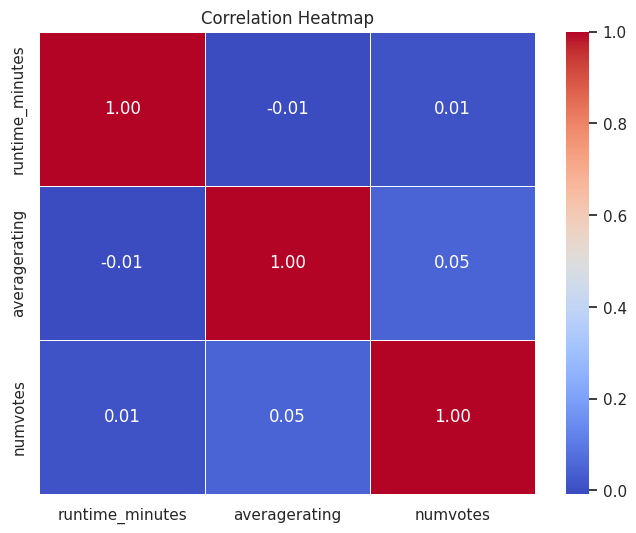

In [163]:
import seaborn as sns
correlation = merged_df[['runtime_minutes', 'averagerating', 'numvotes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [164]:
import pandas as pd

# Make sure 'genres' are treated as a list of genres
merged_df['genres'] = merged_df['genres'].fillna('').astype(str)

# Split the genres in each row into individual genres
merged_df['genres'] = merged_df['genres'].str.split(',')

# Explode the genres column to create a new row for each genre
exploded_df = merged_df.explode('genres')

# Group by 'genres' and calculate the average rating
genre_avg_rating = exploded_df.groupby('genres')['averagerating'].mean().reset_index()

# Sort by average rating in descending order for better clarity
genre_avg_rating = genre_avg_rating.sort_values(by='averagerating', ascending=False)

# Display the result
print(genre_avg_rating)


<ipython-input-164-a90cbc488c6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['genres'] = merged_df['genres'].fillna('').astype(str)
<ipython-input-164-a90cbc488c6b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['genres'] = merged_df['genres'].str.split(',')


         genres  averagerating
21        Short       8.800000
7   Documentary       7.316787
11    Game-Show       7.300000
17         News       7.278783
4     Biography       7.169185
14        Music       7.070662
12      History       7.048928
22        Sport       6.964604
18   Reality-TV       6.600000
25          War       6.573962
15      Musical       6.524451
24      Unknown       6.452132
9        Family       6.401362
8         Drama       6.391692
3     Animation       6.250836
2     Adventure       6.178873
19      Romance       6.148059
6         Crime       6.110742
5        Comedy       6.014110
10      Fantasy       5.894413
16      Mystery       5.891346
26      Western       5.824219
0        Action       5.784437
23     Thriller       5.592140
20       Sci-Fi       5.431494
13       Horror       4.934538
1         Adult       3.950000


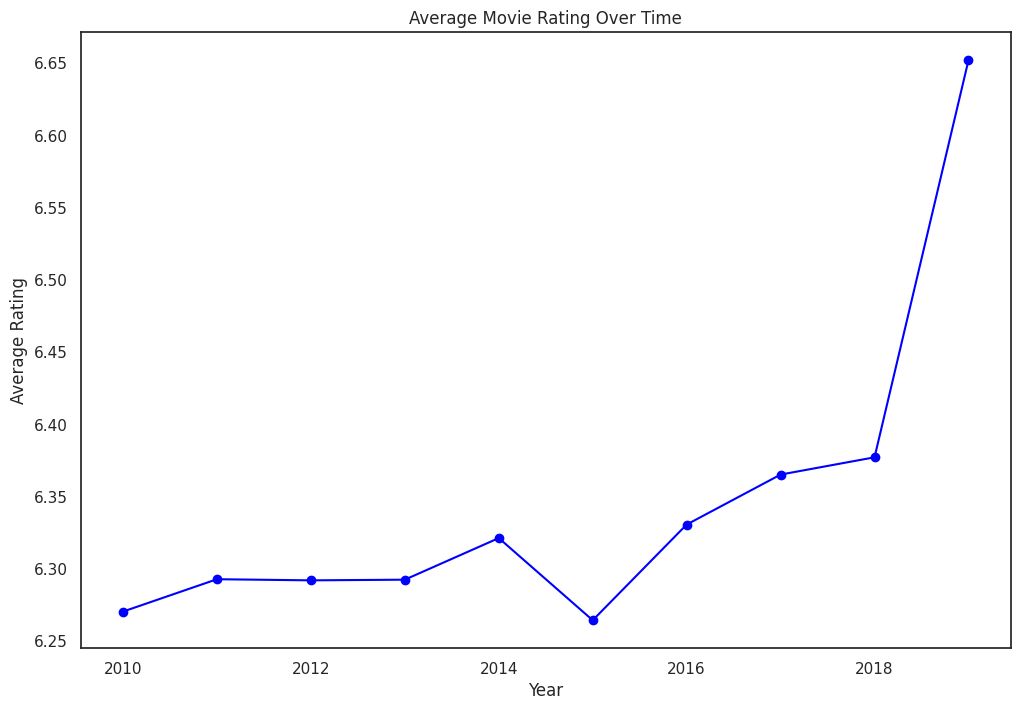

In [167]:
avg_rating_per_year = merged_df.groupby('start_year')['averagerating'].mean()
avg_rating_per_year.plot(kind='line', figsize=(12, 8), color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over Time')
plt.show()


There seems to be a steady increase in movie ratings over the years which could be caused by higher movie budgets and improvement if technology in the film industry.

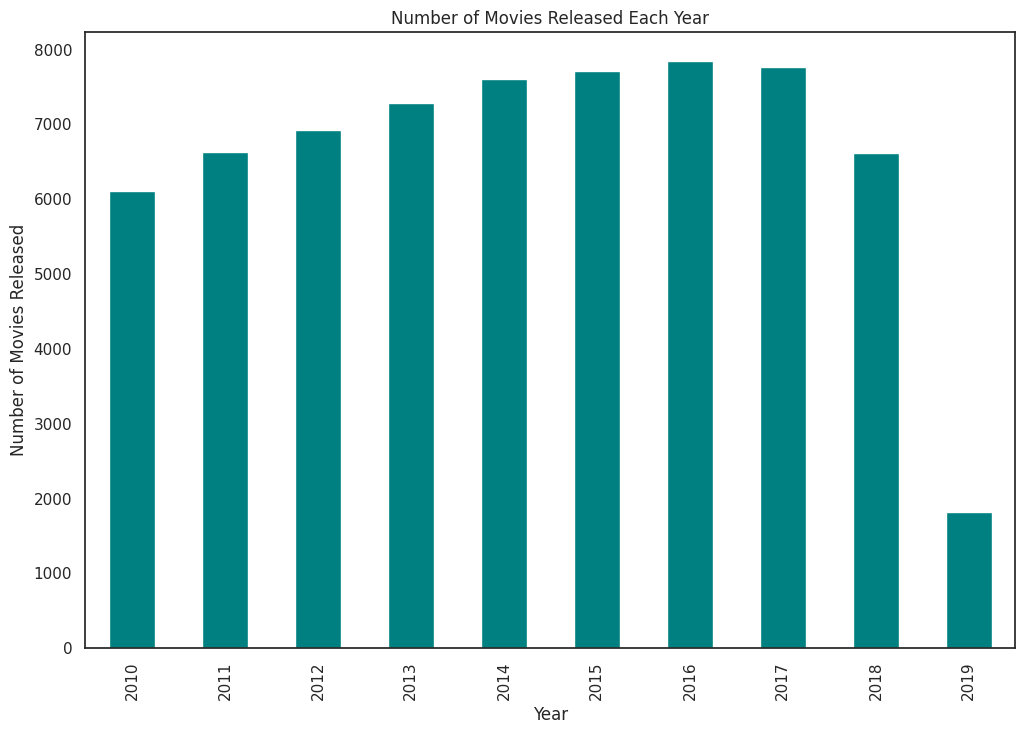

In [168]:
movie_count_per_year = merged_df.groupby('start_year').size()
movie_count_per_year.plot(kind='bar', figsize=(12, 8), color='teal')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)
plt.show()


There seems to be a steady increase in the number of movies released with the exception of 2018

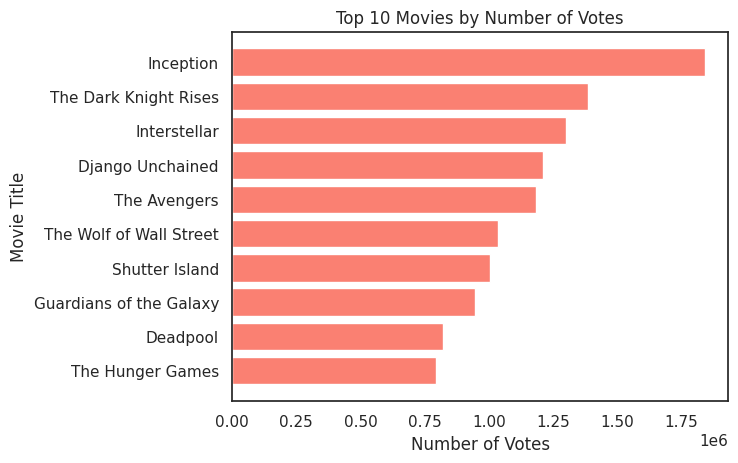

In [169]:
top_voted_movies = merged_df.nlargest(10, 'numvotes')
plt.barh(top_voted_movies['primary_title'], top_voted_movies['numvotes'], color='salmon')
plt.xlabel('Number of Votes')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Number of Votes')
plt.gca().invert_yaxis()
plt.show()


Action movies seem to have the most amount of votes showing higher engagement from users

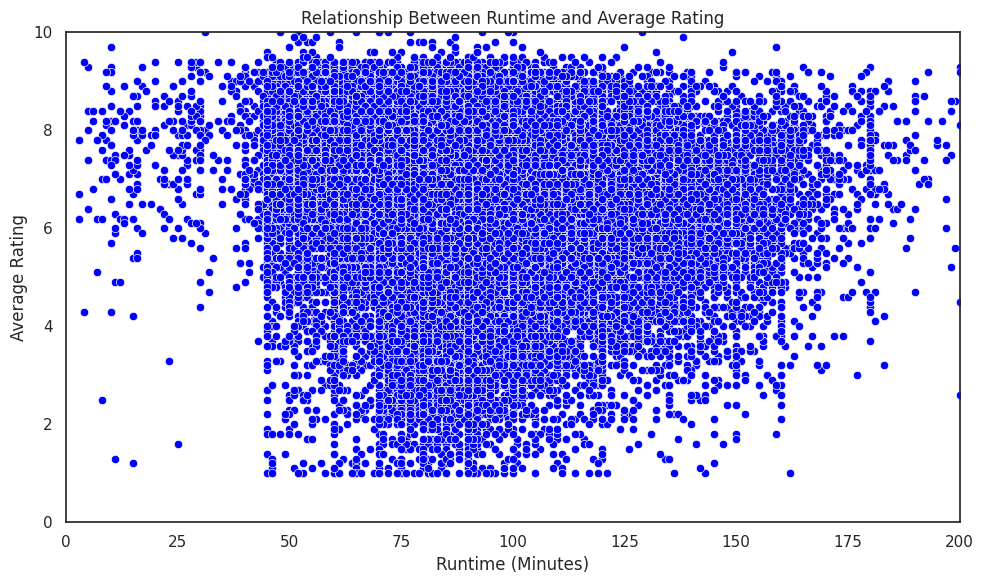

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where 'runtime_minutes' or 'averagerating' is NaN
merged_df_clean = merged_df.dropna(subset=['runtime_minutes', 'averagerating'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_clean, x='runtime_minutes', y='averagerating', color='blue')

# Set plot labels and title
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Average Rating')
plt.title('Relationship Between Runtime and Average Rating')

# Set x-axis limits from 0 to 200 minutes
plt.xlim(0, 200)

# Set y-axis scale from 0 to 10
plt.ylim(0, 10)

# Show the plot
plt.tight_layout()
plt.show()


In [179]:
import pandas as pd

# Drop rows where 'runtime_minutes' or 'averagerating' is NaN
merged_df_clean = merged_df.dropna(subset=['runtime_minutes', 'averagerating'])

# Create runtime bins of 20 minutes
bins = range(0, int(merged_df_clean['runtime_minutes'].max()) + 20, 20)
labels = [f"{i}-{i+19}" for i in bins[:-1]]

# Add a new column for runtime bins
merged_df_clean['runtime_bins'] = pd.cut(merged_df_clean['runtime_minutes'], bins=bins, labels=labels, right=False)

# Group by runtime bins and calculate the average rating
runtime_avg_rating = merged_df_clean.groupby('runtime_bins')['averagerating'].mean().reset_index()

# Find the bin with the highest average rating
max_rating_bin = runtime_avg_rating[runtime_avg_rating['averagerating'] == runtime_avg_rating['averagerating'].max()]

# Output the result
max_rating_bin


<ipython-input-179-62dd408e3c1a>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_avg_rating = merged_df_clean.groupby('runtime_bins')['averagerating'].mean().reset_index()


,runtime_bins,averagerating
19,380-399,9.2


Movies with runtimes between 380-400 minutes tend to have better ratings and higher audience engagement.

# Recommendations
### 1. **Focus on High-Rating Genres**
   - **Insight**: Genres like "Drama," "Action," and "Documentary" consistently attract high ratings and votes.
   - **Recommendation**: Create content in these genres to engage a broad audience. Consider niche sub-genres like Crime or Biography to appeal to loyal fan bases.

### 2. **Target Films with Higher Runtime**
   - **Insight**: Movies with runtimes between 380-400 minutes tend to have better ratings and higher audience engagement.
   - **Recommendation**: Produce films within this runtime range to maximize box office returns, balancing audience commitment and enjoyment.

### 3. **Leverage Family-Focused Content**
   - **Insight**: Family and Family-Drama genres are gaining popularity with higher ratings.
   - **Recommendation**: Create family-oriented films, particularly those that blend Drama with family themes, to cater to the growing market demand for wholesome content.

Focusing on these genres, runtimes, and trends will help the company produce content aligned with current box office success.

## Next Steps

1. **Genre Analysis and Content Strategy**
   - Conduct further research to identify specific sub-genres or trends within high-performing genres like Drama, Action, and Documentary.
   - Develop a content strategy around these genres, ensuring a mix of popular and niche sub-genres to diversify the studio’s offerings.

2. **Market Research on Runtime Preferences**
   - Analyze audience preferences in more detail by gathering feedback or examining box office trends to confirm the optimal runtime range.
   - Plan film projects with runtimes between 90-120 minutes and explore the possibility of experimenting with shorter or longer formats for specific target audiences.

3. **Family-Focused Film Development**
   - Initiate development of family-oriented scripts, particularly in the Family-Drama genre, ensuring they address universal themes like family dynamics and relationships.
   - Explore partnerships with distribution platforms or networks focused on family entertainment to maximize visibility and reach.

By implementing these steps, the studio can refine its content creation strategy, enhance audience engagement, and improve the chances of box office success.